<a href="https://colab.research.google.com/github/mikiemac1975/GIS_COURSE_Michelle/blob/master/Comparing_datasets_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Welcome to your Python notebook##
Firstly, we need to import the tools that you will need to allow Python to work with all the information from your files.

Tools - 

<font color='blue'> Pandas </font>

<font color='blue'> Folium </font>


<font color='blue'> Numpy </font>


In [0]:
import pandas as pd
import folium
import numpy as np

Next, upload the dataset containing the information you will use to create your map. Give it a name - In this case, ours are called gender_dataset and gender_dataset_2.

By entering the command <font color='red'>pd.read_csv </font>, you are asking the notebook to read the file using the <font color='blue'>pandas </font> tool you have just imported.  As you can see from the URL, I have uploaded the datasets from my Github account.

By adding the command <font color='red'>.head()</font> on the second line of this section of code, you are able to view the first few lines of the dataset in the notebook.

In [126]:
gender_dataset = pd.read_csv('https://raw.githubusercontent.com/mikiemac1975/GIS_COURSE_Michelle/master/Gender%20dataset.csv')
gender_dataset.head()


,Cat_No,Trench,Context,Allison use category,use_cat,Material,Material detail original,Type original,Sub-type,Camp,Building,gender original,gender,Length (cm),Rim diameter (cm),Height (cm),Diameter (cm)
0,B0019,1.0,surface,dress,D,Bronze,NaN,Fibulae,"RIHA 2, Hakenfibel",NaN,NW area,male?,ZMa,2.5 (preserved),NaN,1.8,NaN
1,B0051,1.0,surface,dress,D,Bronze,NaN,Fibulae,"RIHA 5.2, Aucissafibel",NaN,NW area,male,Ma,4.5,NaN,2.5,NaN
2,B0161,1.0,surface,dress-combat equipment,DE,Bronze,NaN,Belt plates,NaN,NaN,NW area,male,Ma,4.1,NaN,NaN,NaN
3,E0217,1.0,surface,tableware and serving?/toilet?,ZTS_T,Glass,Coloured,Indeterminate fragments,NaN,NaN,NW area,NaN,U,NaN,NaN,NaN,NaN
4,B0035,1.0,NaN,dress,D,Bronze,NaN,Fibulae,"RIHA 2.7, Knickfibel",NaN,NW area,male?,ZMa,4.2,NaN,1.7,NaN


In [127]:
gender_dataset_2 = pd.read_csv('https://raw.githubusercontent.com/mikiemac1975/GIS_COURSE_Michelle/master/Gender%20dataset%202.csv')
gender_dataset_2.head()

,TRENCH,X_COORD,Y_COORD,PERIMETER,AREA,TRENCH_OLD
0,1.0,-346.46875,1666.15527,6.9006,3.996,1
1,2.0,-347.96875,1835.67236,5.7005,2.484,2
2,3.0,391.70972,2471.73462,7.8007,5.626,3
3,4.0,198.00000,3220.79932,2.5600,9.600,4
4,6.0,313.00000,3238.79932,2.2800,1.040,6


In [128]:
all_data = gender_dataset.merge(gender_dataset_2, how='inner', left_on='Trench', right_on='TRENCH')
all_data.head()

,Cat_No,Trench,Context,Allison use category,use_cat,Material,Material detail original,Type original,Sub-type,Camp,Building,gender original,gender,Length (cm),Rim diameter (cm),Height (cm),Diameter (cm),TRENCH,X_COORD,Y_COORD,PERIMETER,AREA,TRENCH_OLD
0,B0019,1.0,surface,dress,D,Bronze,NaN,Fibulae,"RIHA 2, Hakenfibel",NaN,NW area,male?,ZMa,2.5 (preserved),NaN,1.8,NaN,1.0,-346.46875,1666.15527,6.9006,3.996,1
1,B0051,1.0,surface,dress,D,Bronze,NaN,Fibulae,"RIHA 5.2, Aucissafibel",NaN,NW area,male,Ma,4.5,NaN,2.5,NaN,1.0,-346.46875,1666.15527,6.9006,3.996,1
2,B0161,1.0,surface,dress-combat equipment,DE,Bronze,NaN,Belt plates,NaN,NaN,NW area,male,Ma,4.1,NaN,NaN,NaN,1.0,-346.46875,1666.15527,6.9006,3.996,1
3,E0217,1.0,surface,tableware and serving?/toilet?,ZTS_T,Glass,Coloured,Indeterminate fragments,NaN,NaN,NW area,NaN,U,NaN,NaN,NaN,NaN,1.0,-346.46875,1666.15527,6.9006,3.996,1
4,B0035,1.0,NaN,dress,D,Bronze,NaN,Fibulae,"RIHA 2.7, Knickfibel",NaN,NW area,male?,ZMa,4.2,NaN,1.7,NaN,1.0,-346.46875,1666.15527,6.9006,3.996,1


In [129]:
female = all_data[(all_data['gender original']=="female?")]
female.head()

,Cat_No,Trench,Context,Allison use category,use_cat,Material,Material detail original,Type original,Sub-type,Camp,Building,gender original,gender,Length (cm),Rim diameter (cm),Height (cm),Diameter (cm),TRENCH,X_COORD,Y_COORD,PERIMETER,AREA,TRENCH_OLD
19,C8187,3.0,NaN,toilet?,ZT,Cer_Ut,NaN,Unguentaria,Ha 31,NaN,north gateway,female?,Zfe,NaN,NaN,NaN,NaN,3.0,391.70972,2471.73462,7.8007,5.626,3
34,E0392,24.0,"burnt layer 1, upper",dress?/horse equipment?,ZD_H,Glass,NaN,"Beads, melon",NaN,NaN,Neronian Fortifications,female?,Zfe,NaN,NaN,1.5,NaN,24.0,-1010.32544,1604.08838,4.1404,1.782,24
78,E0393,58.0,pit 2,dress?/horse equipment?,ZD_H,Glass,NaN,"Beads, melon",NaN,A-C,north gateway,female?,Zfe,NaN,NaN,1.5,2,58.0,487.71924,2398.22705,3.9003,2.196,58
98,C8188,72.0,trenches,toilet?,ZT,Cer_Ut,NaN,Unguentaria,Ha 31.,NaN,Neronian Fortifications,female?,Zfe,NaN,NaN,NaN,NaN,72.0,1474.00000,2692.27539,8.8000,2.880,72
106,C8183,145.0,pit 41,toilet?,ZT,Cer_Ut,NaN,Unguentaria,Ha 30,A-C(?),east gateway,female?,Zfe,NaN,NaN,NaN,NaN,145.0,1906.54785,-66.10254,1.1999,3.730,145


In [130]:
child = all_data[(all_data['gender original']=="female?/child?")]
child.head()

,Cat_No,Trench,Context,Allison use category,use_cat,Material,Material detail original,Type original,Sub-type,Camp,Building,gender original,gender,Length (cm),Rim diameter (cm),Height (cm),Diameter (cm),TRENCH,X_COORD,Y_COORD,PERIMETER,AREA,TRENCH_OLD
17,B0459,3.0,NaN,dress?,ZD,Bronze,NaN,Rings,NaN,NaN,north gateway,female?/child?,Zfe_Ch,NaN,NaN,NaN,1.6,3.0,391.70972,2471.73462,7.8007,5.626,3
54,B0462,37.0,in trench,dress?,ZD,Bronze,NaN,Rings,NaN,NaN,Fortline A-Neronian Fortifications,female?/child?,Zfe_Ch,NaN,NaN,NaN,1.7,37.0,-601.39160,2851.79932,1.0402,4.600,37
86,B0465,59.0,surface,dress?,ZD,Bronze,NaN,Rings,NaN,NaN,north gateway,female?/child?,Zfe_Ch,NaN,NaN,NaN,1.5,59.0,490.71924,2282.71558,3.2403,2.205,59
142,B0247,212.0,"east gateway, pit 38",dress?/music?,ZD_Mu,Bronze,NaN,Bells,NaN,NaN,Fortline C,female?/child?,Zfe_Ch,NaN,NaN,small,NaN,212.0,2042.50000,34.02539,7.5000,1.340,212
178,B0256,266.0,in debris of foundations of principia,dress?/music?,ZD_Mu,Bronze,NaN,Bells,NaN,NaN,central market area,female?/child?,Zfe_Ch,NaN,NaN,1.2,NaN,266.0,613.00049,-11.72559,1.7714,6.370,266


In [131]:
gender = pd.concat([female, child], sort=False, ignore_index=True)
gender.head()

,Cat_No,Trench,Context,Allison use category,use_cat,Material,Material detail original,Type original,Sub-type,Camp,Building,gender original,gender,Length (cm),Rim diameter (cm),Height (cm),Diameter (cm),TRENCH,X_COORD,Y_COORD,PERIMETER,AREA,TRENCH_OLD
0,C8187,3.0,NaN,toilet?,ZT,Cer_Ut,NaN,Unguentaria,Ha 31,NaN,north gateway,female?,Zfe,NaN,NaN,NaN,NaN,3.0,391.70972,2471.73462,7.8007,5.626,3
1,E0392,24.0,"burnt layer 1, upper",dress?/horse equipment?,ZD_H,Glass,NaN,"Beads, melon",NaN,NaN,Neronian Fortifications,female?,Zfe,NaN,NaN,1.5,NaN,24.0,-1010.32544,1604.08838,4.1404,1.782,24
2,E0393,58.0,pit 2,dress?/horse equipment?,ZD_H,Glass,NaN,"Beads, melon",NaN,A-C,north gateway,female?,Zfe,NaN,NaN,1.5,2,58.0,487.71924,2398.22705,3.9003,2.196,58
3,C8188,72.0,trenches,toilet?,ZT,Cer_Ut,NaN,Unguentaria,Ha 31.,NaN,Neronian Fortifications,female?,Zfe,NaN,NaN,NaN,NaN,72.0,1474.00000,2692.27539,8.8000,2.880,72
4,C8183,145.0,pit 41,toilet?,ZT,Cer_Ut,NaN,Unguentaria,Ha 30,A-C(?),east gateway,female?,Zfe,NaN,NaN,NaN,NaN,145.0,1906.54785,-66.10254,1.1999,3.730,145


In [132]:
gender.dtypes

Cat_No                       object
Trench                      float64
Context                      object
Allison use category         object
use_cat                      object
Material                     object
Material detail original     object
Type original                object
Sub-type                     object
Camp                         object
Building                     object
gender original              object
gender                       object
Length (cm)                  object
Rim diameter (cm)            object
Height (cm)                  object
Diameter (cm)                object
TRENCH                      float64
X_COORD                     float64
Y_COORD                     float64
PERIMETER                   float64
AREA                        float64
TRENCH_OLD                    int64
dtype: object

In [133]:
gender.astype('object').fillna(0)

,Cat_No,Trench,Context,Allison use category,use_cat,Material,Material detail original,Type original,Sub-type,Camp,Building,gender original,gender,Length (cm),Rim diameter (cm),Height (cm),Diameter (cm),TRENCH,X_COORD,Y_COORD,PERIMETER,AREA,TRENCH_OLD
0,C8187,3.0,0,toilet?,ZT,Cer_Ut,0,Unguentaria,Ha 31,0,north gateway,female?,Zfe,0,0,0,0,3.0,391.70972,2471.73462,7.8007,5.626,3
1,E0392,24.0,"burnt layer 1, upper",dress?/horse equipment?,ZD_H,Glass,0,"Beads, melon",0,0,Neronian Fortifications,female?,Zfe,0,0,1.5,0,24.0,-1010.32544,1604.08838,4.1404,1.782,24
2,E0393,58.0,pit 2,dress?/horse equipment?,ZD_H,Glass,0,"Beads, melon",0,A-C,north gateway,female?,Zfe,0,0,1.5,2,58.0,487.71924,2398.22705,3.9003,2.196,58
3,C8188,72.0,trenches,toilet?,ZT,Cer_Ut,0,Unguentaria,Ha 31.,0,Neronian Fortifications,female?,Zfe,0,0,0,0,72.0,1474.00000,2692.27539,8.8000,2.880,72
4,C8183,145.0,pit 41,toilet?,ZT,Cer_Ut,0,Unguentaria,Ha 30,A-C(?),east gateway,female?,Zfe,0,0,0,0,145.0,1906.54785,-66.10254,1.1999,3.730,145
5,J0009,212.0,"east gateway, coin pit",dress?,ZD,Bone,0,Discs,0,A-C(?),Fortline C,female?,Zfe,0,0,,1.3,212.0,2042.50000,34.02539,7.5000,1.340,212
6,E0394,247.0,pit above north trench,dress?/horse equipment?,ZD_H,Glass,0,"Beads, melon",0,0,P,female?,Zfe,0,0,1.7,1.2,247.0,869.66650,159.94141,5.8850,1.540,247
7,E0395,267.0,in debris of foundations of principia,dress?/horse equipment?,ZD_H,Glass,0,"Beads, melon",0,0,A-B,female?,Zfe,0,0,1.3,1.8,267.0,570.66650,405.44189,7.7800,3.543,267
8,E0138,288.0,"pit 6, in wood-line (cellar)",toilet?,ZT,Glass,Natural,Unguentaria,0,Neronian,central market area (C),female?,Zfe,0,0,0,0,288.0,513.66650,-155.72461,5.0407,8.260,288
9,E0143,288.0,"pit 6, in wood-line (cellar)",toilet?,ZT,Glass,Natural,Unguentaria,0,Neronian,central market area (C),female?,Zfe,0,2.5,0,0,288.0,513.66650,-155.72461,5.0407,8.260,288


In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
!pip install geopandas
import geopandas as gpd

In [135]:
gdf_survey = gpd.GeoDataFrame(gender, geometry=gpd.points_from_xy(gender.X_COORD, gender.Y_COORD))
print(gdf_survey.head())

  Cat_No  Trench  ... TRENCH_OLD                    geometry
0  C8187     3.0  ...          3    POINT (391.710 2471.735)
1  E0392    24.0  ...         24  POINT (-1010.325 1604.088)
2  E0393    58.0  ...         58    POINT (487.719 2398.227)
3  C8188    72.0  ...         72   POINT (1474.000 2692.275)
4  C8183   145.0  ...        145    POINT (1906.548 -66.103)

[5 rows x 24 columns]


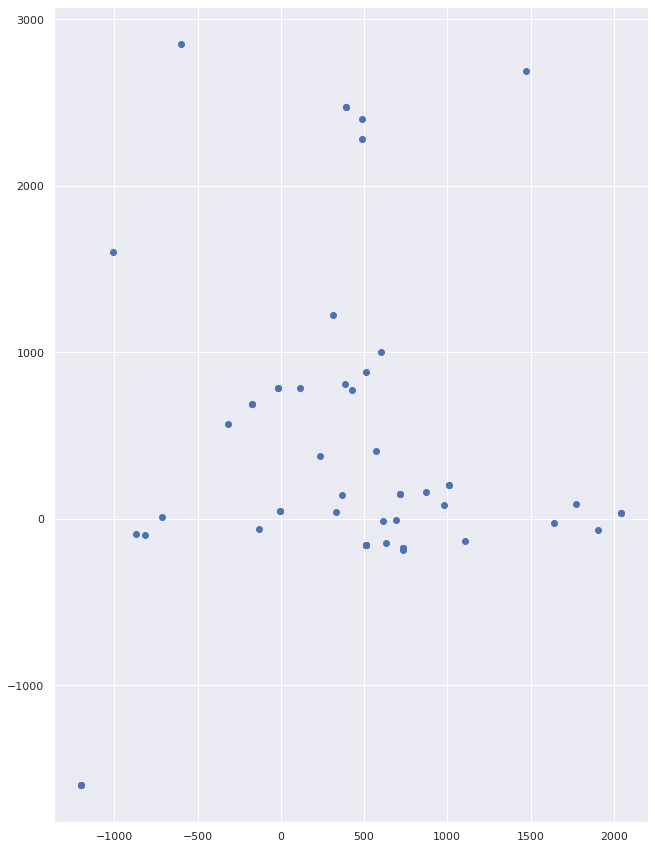

In [136]:
gdf_survey.plot(categorical=True, legend=True, figsize=(15,15))

In [0]:
from folium.plugins import HeatMapWithTime

In [138]:
location = gender ['Y_COORD'].mean(), gender['X_COORD'].mean()
print(location)

(392.04395592592584, 396.15160037037043)


In [0]:
def generateBaseMap(default_location=[392.04395592592584, 396.15160037037043], default_zoom_start=11):
  base_map= folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
  return base_map
